# Table of Contents <a class="anchor" id="toc"></a>

* [Classifying Iris Species](#iris)
 * [Meet the data (EDA)](#iris_data)
 * [Scatter Matrix](#Scatter_Matrix)
 * [Distributions](#Distributions)
 * [Boxplots](#Boxplots)
 * [Radviz](#Radviz)
 * [kNN Classification](#kNN)
 * [Logistic Classification](#Logistic_Classification)
 * [PCA](#PCA)

 
 
 
 
 
 
 Distributions

* [Import modules](#Import)
* [Get dataset](#Datasets)
* [Archive](#Archive)


In [15]:
import pyforest
import bamboolib as bam
import missingno as msno
import seaborn as sns
#import mglearn

In [17]:
!pip install seaborn --upgrade #or also !pip install seaborn==0.9.0
import seaborn as sns
sns.__version__

     |████████████████████████████████| 292 kB 4.5 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bamboolib 1.26.0 requires seaborn<0.11,>=0.10, but you have seaborn 0.11.2 which is incompatible.


'0.10.1'

In [16]:
sns.__version__

'0.10.1'

<h1 style="
    background-color:Black; 
    color:White;
    font-size: 30px;
    padding: 2px;
    border-style: solid;
    border-width: 2px 2px;
    border-color: black">
    Problem > Data > Analysis > Model > Conclusions
</h1>


# Example: Iris <a class="anchor" id="iris"></a>

* [Back to TOC](#toc)

### Meet the Data <a class="anchor" id="iris_data"></a>

* [Back to TOC](#toc)

In [6]:
penguins = sns.load_dataset("penguins")
mpg = sns.load_dataset("mpg")
iris = sns.load_dataset("iris")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
bam

BamboolibModuleWindow(children=(Window(children=(VBox(children=(VBox(children=(Button(description='Read CSV fi…

In [19]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
iris.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

<AxesSubplot:>

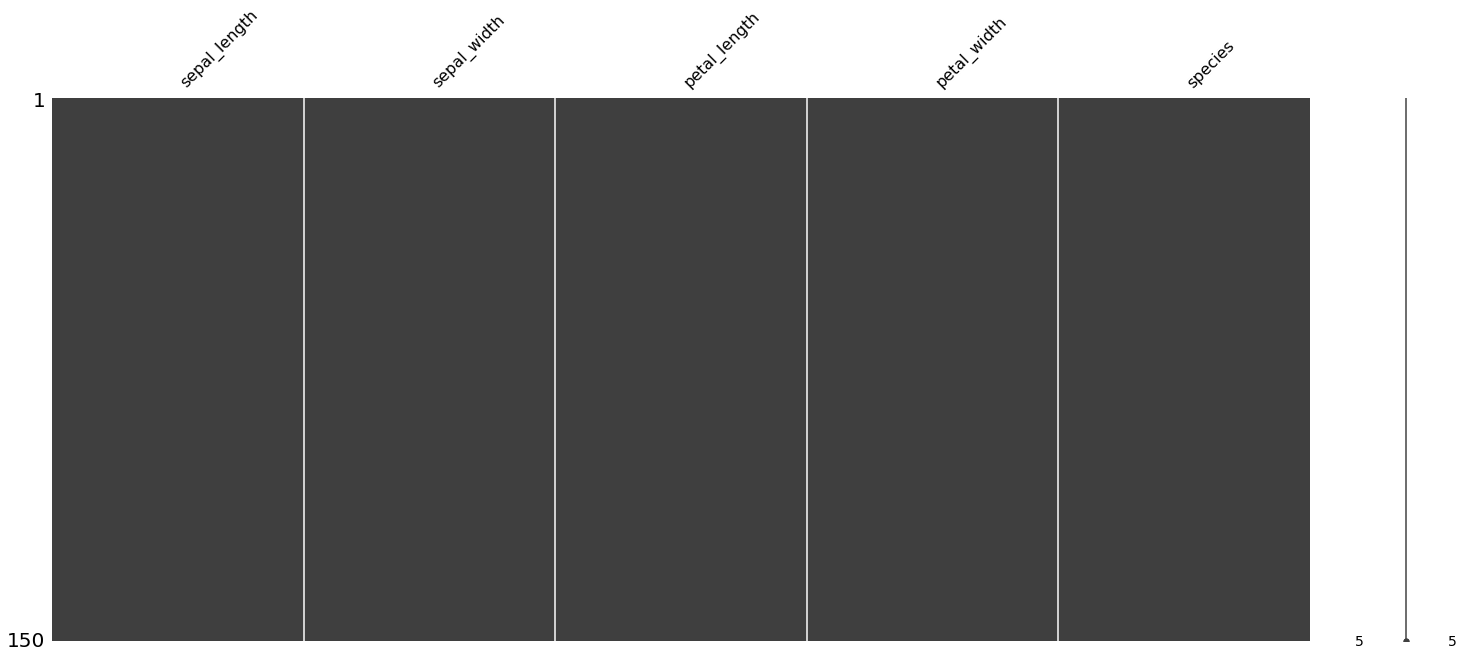

In [9]:
msno.matrix(iris)

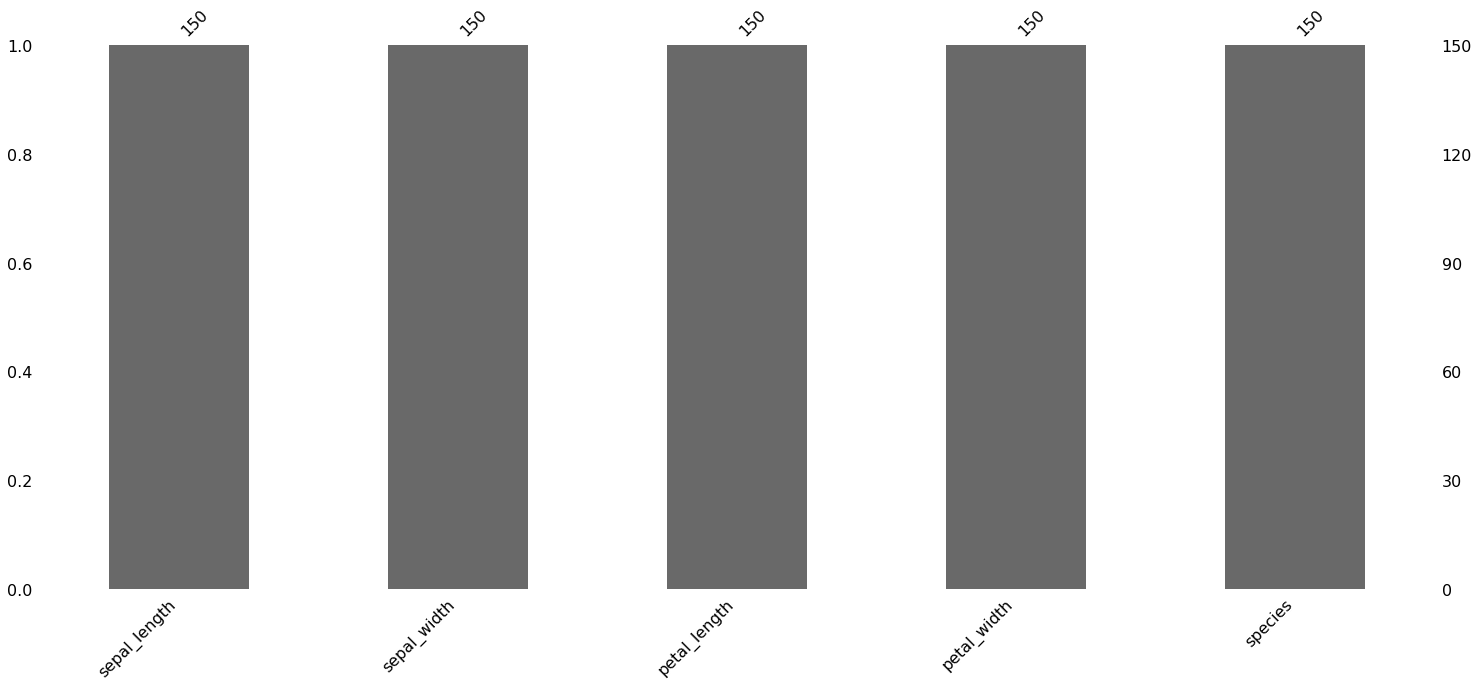

In [10]:
# visualization for the data
p=msno.bar(iris)

In [ ]:
 msno.dendrogram(iris)

<h1 style="
    background-color:Black; 
    color:White;
    font-size: 30px;
    padding: 2px;
    border-style: solid;
    border-width: 2px 2px;
    border-color: black">
    Info
</h1>

In [21]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<h1 style="
    background-color:Black; 
    color:White;
    font-size: 30px;
    padding: 2px;
    border-style: solid;
    border-width: 2px 2px;
    border-color: black">
    Head
</h1>

In [22]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<h1 style="
    background-color:Black; 
    color:White;
    font-size: 30px;
    padding: 2px;
    border-style: solid;
    border-width: 2px 2px;
    border-color: black">
    Describe
</h1>

In [23]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris_features = iris.select_dtypes('number')
iris_features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<a class="anchor" id="Distributions"></a>

<h1 style="
    background-color:dodgerblue; 
    color:White;
    font-size: 30px;
    padding: 2px;
    border-style: solid;
    border-width: 2px 2px;
    border-color: dodgerblue">
    Distributions
</h1>

[Back to TOC](#toc)

In [24]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
penguins

In [ ]:
import numpy as np
import plotly.graph_objs as go

import plotly.express as px
fig = px.scatter_matrix(penguins, color='species')



def show_in_window(fig):
    import sys, os
    import plotly.offline
    from PyQt5.QtCore import QUrl
    from PyQt5.QtWebEngineWidgets import QWebEngineView
    from PyQt5.QtWidgets import QApplication
    
    plotly.offline.plot(fig, filename='name.html', auto_open=True)
    
    app = QApplication(sys.argv)
    web = QWebEngineView()
    file_path = os.path.abspath(os.path.join(os.path.dirname(__file__), "name.html"))
    web.load(QUrl.fromLocalFile(file_path))
    web.show()
    sys.exit(app.exec_())


show_in_window(fig)

In [13]:
mpg = sns.load_dataset("mpg")

<IPython.core.display.Javascript object>

In [14]:
g = sns.displot(
    penguins, 
    x="flipper_length_mm", 
    hue="sex",
    #row = "island",
    col="species",
    kind = "kde", #"hist"the default or "kde" or "ecdf" univariate-only
    #kde=True,
    rug = True,
    height=4, 
    aspect=.7,
    )

g.set_axis_labels("Density (a.u.)", "Flipper length (mm)")
g.set_titles("{col_name} penguins")
g.fig.suptitle('IT IS ALL ABOUT PENGUINS', y=1.01) # can also get the figure from plt.gcf()

<IPython.core.display.Javascript object>

AttributeError: module 'seaborn' has no attribute 'displot'

In [ ]:
# Compute number of data points: n_data
n_data = iris.shape[0]

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data*2)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)
for feature in iris_features:
    sns.displot(iris, x=feature, hue="species",element="step", kde = True, bins = n_bins)

In [ ]:
iris.plot.kde(by="species", figsize=(10, 5))

In [ ]:
iris.groupby("species").plot(subplots = 4, kind='kde', figsize = (10,5))

In [ ]:
df = iris.copy()

for feature in iris_features:
    g = sns.displot(
        data=df, 
        x = feature, 
        hue="species",
        #row = "island",
        col="species",
        kind = "kde", #"hist"the default or "kde" or "ecdf" univariate-only
        #kde=True,
        rug = True,
        height=4, 
        aspect=.7,
        )

    g.set_axis_labels("Density (a.u.)", feature)
    g.set_titles("{col_name}", feature)
    g.fig.suptitle('IT IS ALL ABOUT IRIS', y=1.01) # can also get the figure from plt.gcf()

## cumulative distribution function (CDF) Plot with Plotly

In [ ]:
data = iris["sepal_length"]

def ecdf(x):
    x = np.sort(x)
    def result(v):
        return np.searchsorted(x, v, side='right') / x.size
    return result

xs = np.unique(data)
steps=ecdf(data)(np.unique(data))

xs1 = np.column_stack([np.insert(xs,0,xs[0]-np.diff(xs).mean()),
                       np.append(xs, xs[-1]+np.diff(xs).mean())])
steps1 = np.concatenate([[[0,0]], np.column_stack([steps,steps])])

xs2 = np.column_stack([xs,xs])
steps2 = np.column_stack([np.insert(steps, 0, 0)[:-1], steps])


fig = go.Figure()
for i in range(len(steps)+1):
    fig.add_scatter(x=xs1[i],y=steps1[i], mode='lines', line_color='#367588', name='')
for i in range(len(steps)):
    fig.add_scatter(x=xs2[i],y=steps2[i], mode='lines', line_color='#367588', line_dash='dot', name='')
fig.add_scatter(x=xs, y=steps, mode='markers', marker_color='#367588', name='')
fig.add_scatter(x=xs, y=np.pad(steps,1)[:-2], mode='markers', marker_color='white', marker = dict(line_color='#367588', line_width=1), name='')
fig.layout.update(title='Empirical CDF', showlegend=False)
fig.show() #renderer='svg', height=600, width=1000

<a class="anchor" id="CDF"></a>

<h1 style="
    background-color:Black; 
    color:White;
    font-size: 30px;
    padding: 2px;
    border-style: solid;
    border-width: 2px 2px;
    border-color: black">
    CDF (cumulative distribution function)
</h1>

In [ ]:
for feature in iris_features:
    sns.displot(iris, x=feature, hue="species",kind="ecdf")

iris['species'] = iris['species'].astype('category')
iris

<a class="anchor" id="Scatter_Matrix"></a>

<h1 style="
    background-color:Black; 
    color:White;
    font-size: 30px;
    padding: 2px;
    border-style: solid;
    border-width: 2px 2px;
    border-color: black">
    Scatter Matrix
</h1>

[Back to TOC](#toc)

In [1]:
import plotly.express as px
fig = px.scatter_matrix(iris, color='species', template='plotly_white', opacity=0.3, title = "Iris Scatter Matrix")
fig.update_layout(autosize=True, font_size=8)
fig.update_layout({"xaxis"+str(i+1): dict(tickangle = -45) for i in range(10)})
fig.update_layout({"yaxis"+str(i+1): dict(tickangle = -45) for i in range(10)})
fig.show()

NameError: name 'iris' is not defined

In [2]:
g = sns.PairGrid(iris, hue="species",diag_sharey=True)

g.map_upper(sns.scatterplot, s=10, alpha=0.7)
g.map_lower(sns.kdeplot, alpha=0.7)
g.map_diag(sns.kdeplot, lw=1)

g.add_legend()
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('IRIS - Scatter Matrix')

<IPython.core.display.Javascript object>

NameError: name 'iris' is not defined

In [ ]:
iris['species_label'] = iris['species'].factorize(sort=False, na_sentinel=-1)[0]
iris


from pandas.plotting import scatter_matrix

colors_palette = {0: "red", 1: "green", 2: "blue"}
colors = [colors_palette[c] for c in iris["species_label"]]   
scatter_matrix(iris, alpha=0.5, figsize=(15, 15), diagonal='kde', color=colors, grid = True)
plt.show()

<a class="anchor" id="Boxplots"></a>

<h1 style="
    background-color:Black; 
    color:White;
    font-size: 30px;
    padding: 2px;
    border-style: solid;
    border-width: 2px 2px;
    border-color: black">
    Boxplots
</h1>

[Back to TOC](#toc)

In [ ]:
selection = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']]
selection.boxplot(by="species", figsize=(10, 10))

In [ ]:
groupies = iris.groupby("species")

groupies.boxplot(figsize=(15,15))

In [ ]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
iris_features = iris[features]

In [ ]:
iris_mean = iris.groupby(['species']).agg({col: ['median'] for col in iris.select_dtypes('number').columns})
iris_mean.columns = ['_'.join(multi_index) for multi_index in iris_mean.columns.ravel()]
iris_mean = iris_mean.reset_index()
iris_mean

In [ ]:
iris_cl = iris.drop(columns=['species_label'])
iris_cl
import plotly.express as px
fig = px.box(iris_cl, color='species', template='plotly_white')
fig.update_layout(autosize=True)
fig

<a class="anchor" id="Radviz"></a>

<h1 style="
    background-color:Black; 
    color:White;
    font-size: 30px;
    padding: 2px;
    border-style: solid;
    border-width: 2px 2px;
    border-color: black">
    Radviz
</h1>

[Back to TOC](#toc)

In [ ]:
from pandas.plotting import radviz

pd.plotting.radviz(iris,'species', colormap = "gist_rainbow")

In [ ]:
iris_eda = iris.drop(columns=['species_label', 'code'], errors = "ignore")
iris_eda

pd.pivot_table(iris_eda, columns=['species'], aggfunc=['mean',"std"])

### Parralel Coordinates

Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

In [ ]:
df = iris.copy()

In [ ]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(15,10))
parallel_coordinates(df, "species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()